This dataset contains the medical records of 299 patients who had heart failure, collected during their follow-up period, where each patient profile has 13 clinical features.



In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score

ANALYSIS:
EDA and statistical data analysis was performed and the factors such as high blood pressure, serum creatinine, creatinine phosphatokinase, anaemia, platelets, sex and smoking were determined and analysed. Machine learning methods such as random forest classifier,support vector machine, Decision Tree, KNN, GaussianNB were applied.


In [ ]:
df = pd.read_csv('/content/heart+failure+clinical+records.zip')
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [ ]:
df.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


In [ ]:
df.shape

(299, 13)

In [ ]:
df.columns

Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time',
       'DEATH_EVENT'],
      dtype='object')

In [ ]:
df.isnull().sum()

,0
age,0
anaemia,0
creatinine_phosphokinase,0
diabetes,0
ejection_fraction,0
high_blood_pressure,0
platelets,0
serum_creatinine,0
serum_sodium,0
sex,0


In [ ]:
num = df.select_dtypes(include=np.number)
cat = df.select_dtypes(include=['object','category'])

In [ ]:
num.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [ ]:
df.columns

Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time',
       'DEATH_EVENT'],
      dtype='object')

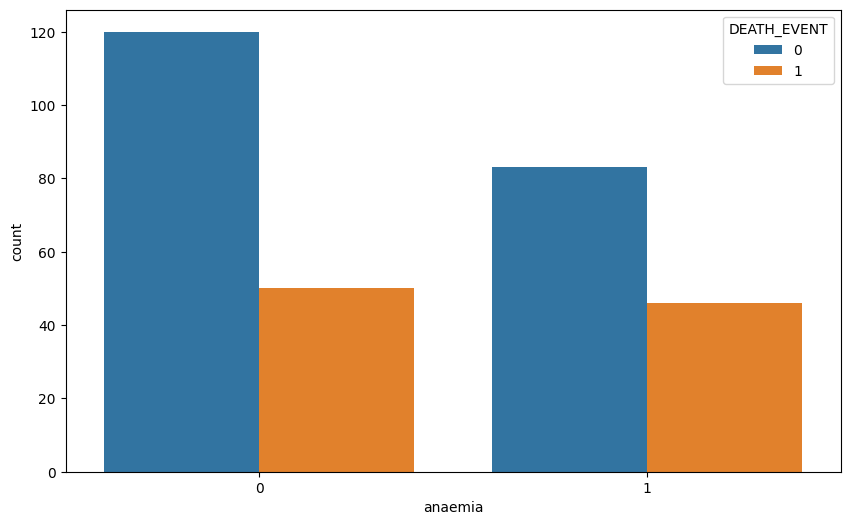

In [ ]:
# anaemia

plt.figure(figsize=(10,6))
sns.countplot(x='anaemia', hue='DEATH_EVENT',data=df)
plt.show()

<Axes: xlabel='creatinine_phosphokinase'>

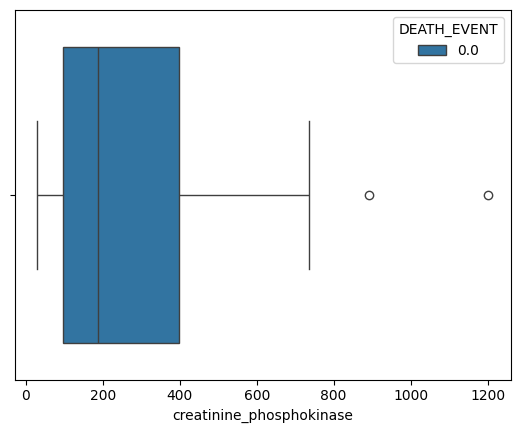

In [ ]:
# remove outliers

Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
df = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]

sns.boxplot(x=sample['creatinine_phosphokinase'], hue='DEATH_EVENT',data=df)

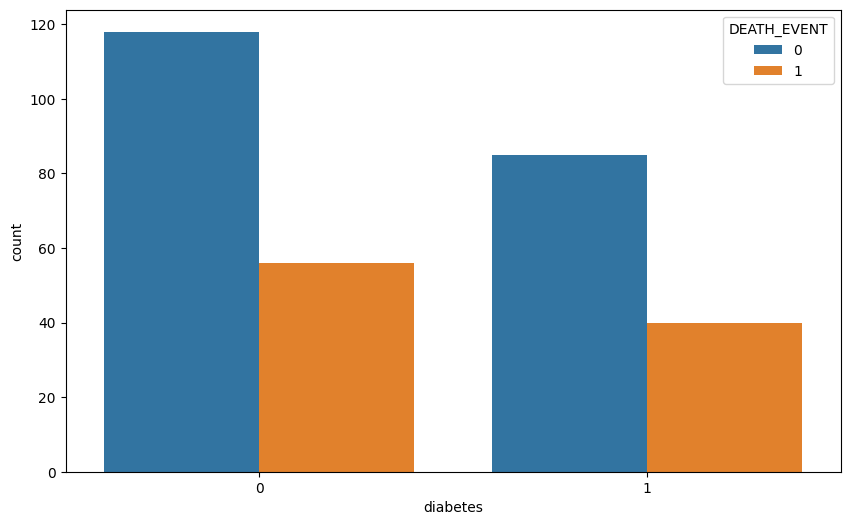

In [ ]:
# diabetes
plt.figure(figsize=(10,6))
sns.countplot(x='diabetes', hue='DEATH_EVENT',data=df)
plt.xlabel('diabetes')
plt.ylabel('count')
plt.show()

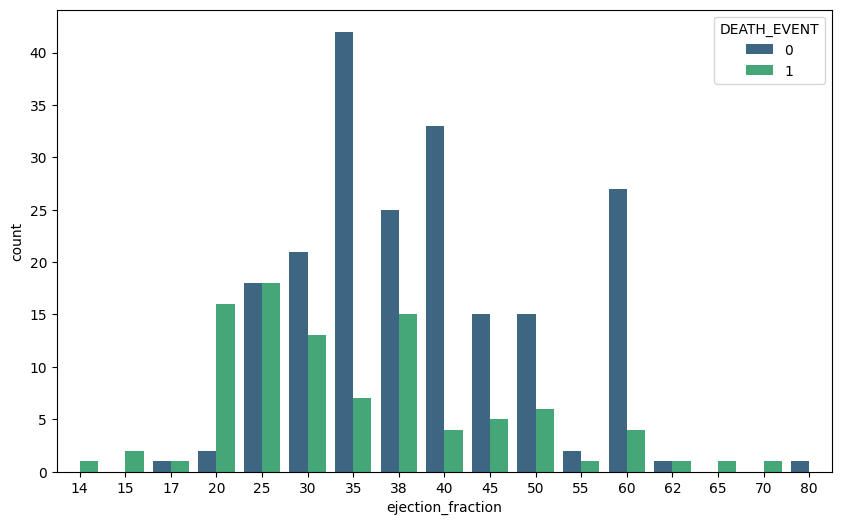

In [ ]:
# ejection fraction

plt.figure(figsize=(10,6))
sns.countplot(x='ejection_fraction', hue='DEATH_EVENT',data=df, palette='viridis')
plt.show()

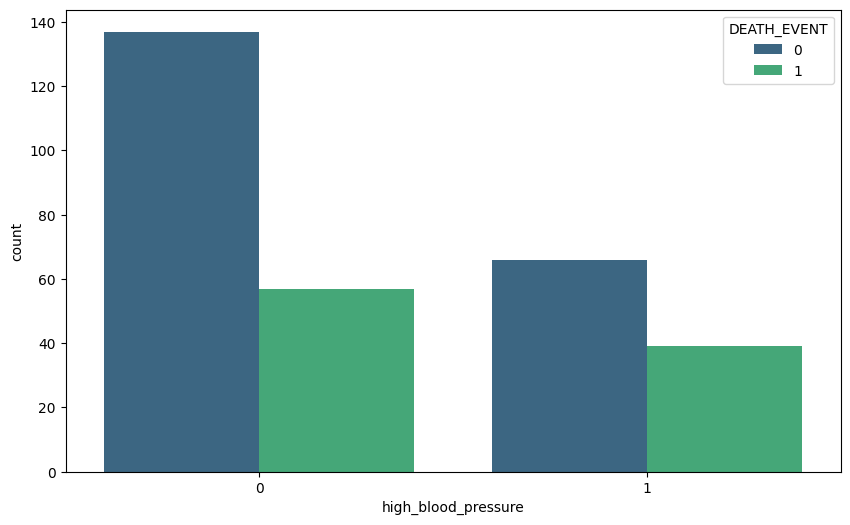

In [ ]:
# high blood pressure

plt.figure(figsize=(10,6))
sns.countplot(x='high_blood_pressure', hue='DEATH_EVENT',data=df, palette='viridis')
plt.show()

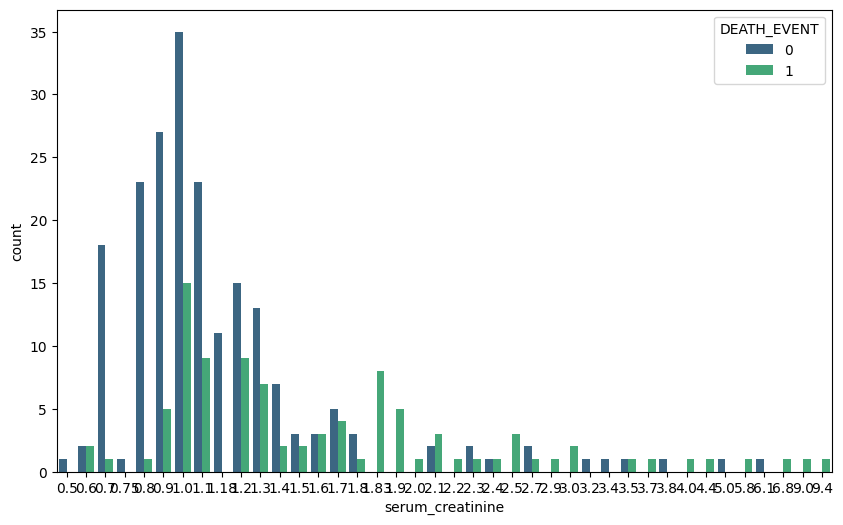

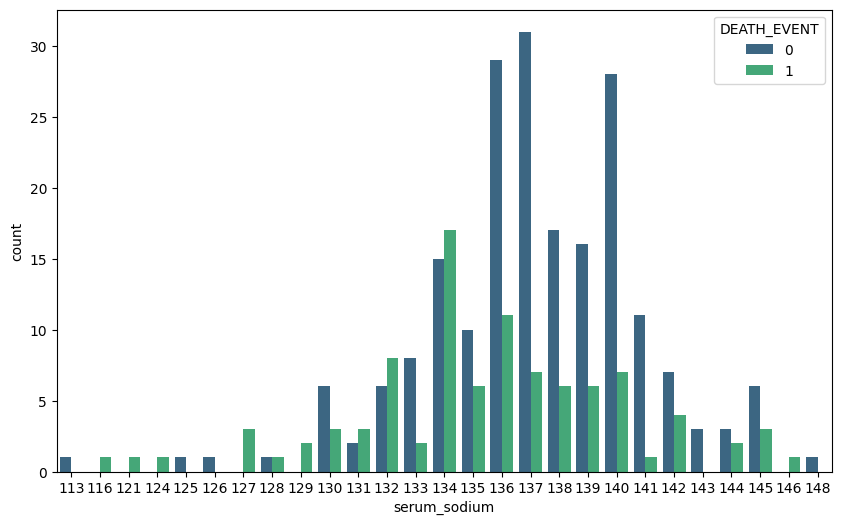

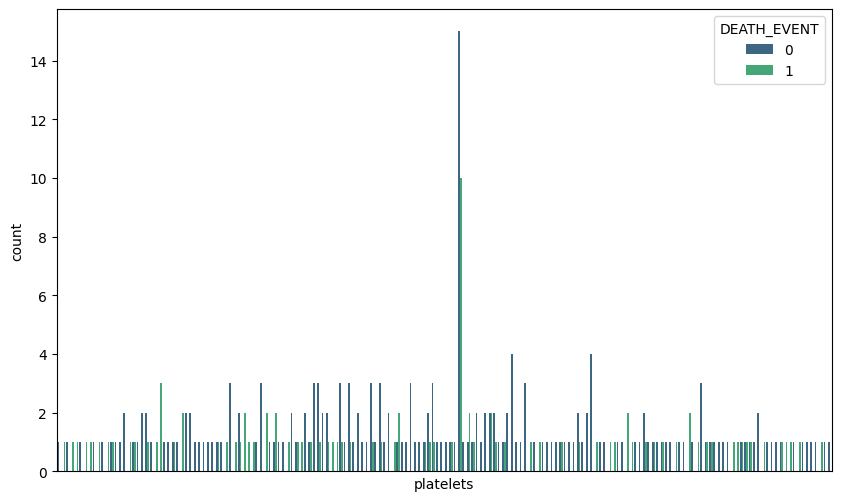

In [ ]:
# serum creatinine, serum sodium, platelets,

sample = df.sample(n=100)

plt.figure(figsize=(10,6))
sns.countplot(x='serum_creatinine', hue='DEATH_EVENT',data=df, palette='viridis')
plt.show()

plt.figure(figsize=(10,6))
sns.countplot(x='serum_sodium', hue='DEATH_EVENT',data=df, palette='viridis')
plt.show()

plt.figure(figsize=(10,6))
sns.countplot(x='platelets', hue='DEATH_EVENT',data=df, palette='viridis')
plt.xticks([])
plt.show()

<Axes: xlabel='platelets'>

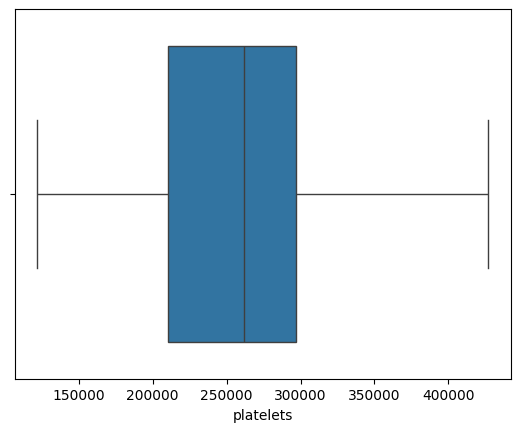

In [ ]:
# remove outliers

Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
df = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]

sns.boxplot(x=df['platelets'])

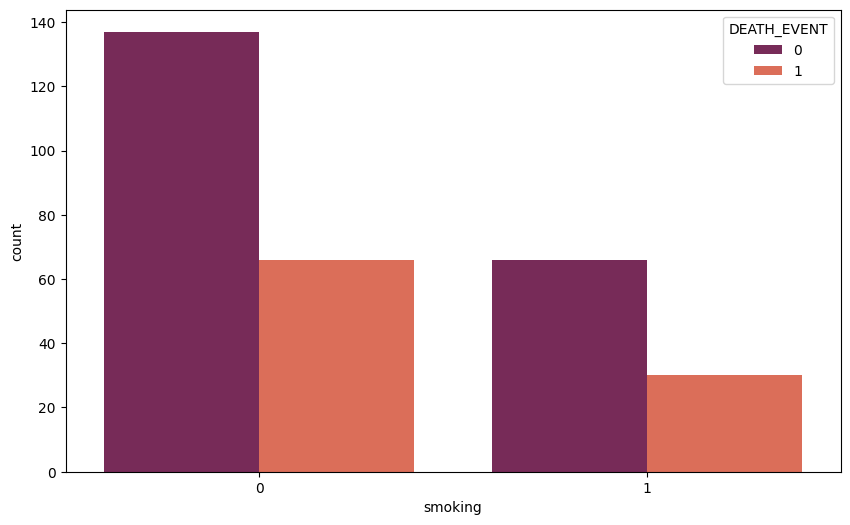

In [ ]:
# smoking

plt.figure(figsize=(10,6))
sns.countplot(x='smoking', hue='DEATH_EVENT',data=df, palette='rocket')
plt.show()

CORRELATION

In [ ]:
correlation = df.corr()
correlation

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
age,1.000000,0.088006,-0.081584,-0.101012,0.060098,0.093289,-0.052354,0.159187,-0.045966,0.065430,0.018668,-0.224068,0.253729
anaemia,0.088006,1.000000,-0.190741,-0.012729,0.031557,0.038182,-0.043786,0.052174,0.041882,-0.094769,-0.107290,-0.141414,0.066270
creatinine_phosphokinase,-0.081584,-0.190741,1.000000,-0.009639,-0.044080,-0.070590,0.024463,-0.016408,0.059550,0.079791,0.002421,-0.009346,0.062728
diabetes,-0.101012,-0.012729,-0.009639,1.000000,-0.004850,-0.012732,0.092193,-0.046975,-0.089551,-0.157730,-0.147173,0.033726,-0.001943
ejection_fraction,0.060098,0.031557,-0.044080,-0.004850,1.000000,0.024445,0.072177,-0.011302,0.175902,-0.148386,-0.067315,0.041729,-0.268603
high_blood_pressure,0.093289,0.038182,-0.070590,-0.012732,0.024445,1.000000,0.049963,-0.004935,0.037109,-0.104615,-0.055711,-0.196439,0.079351
platelets,-0.052354,-0.043786,0.024463,0.092193,0.072177,0.049963,1.000000,-0.041198,0.062125,-0.125120,0.028234,0.010514,-0.049139
serum_creatinine,0.159187,0.052174,-0.016408,-0.046975,-0.011302,-0.004935,-0.041198,1.000000,-0.189095,0.006970,-0.027414,-0.149315,0.294278
serum_sodium,-0.045966,0.041882,0.059550,-0.089551,0.175902,0.037109,0.062125,-0.189095,1.000000,-0.027566,0.004813,0.087640,-0.195204
sex,0.065430,-0.094769,0.079791,-0.157730,-0.148386,-0.104615,-0.125120,0.006970,-0.027566,1.000000,0.445892,-0.015608,-0.004316


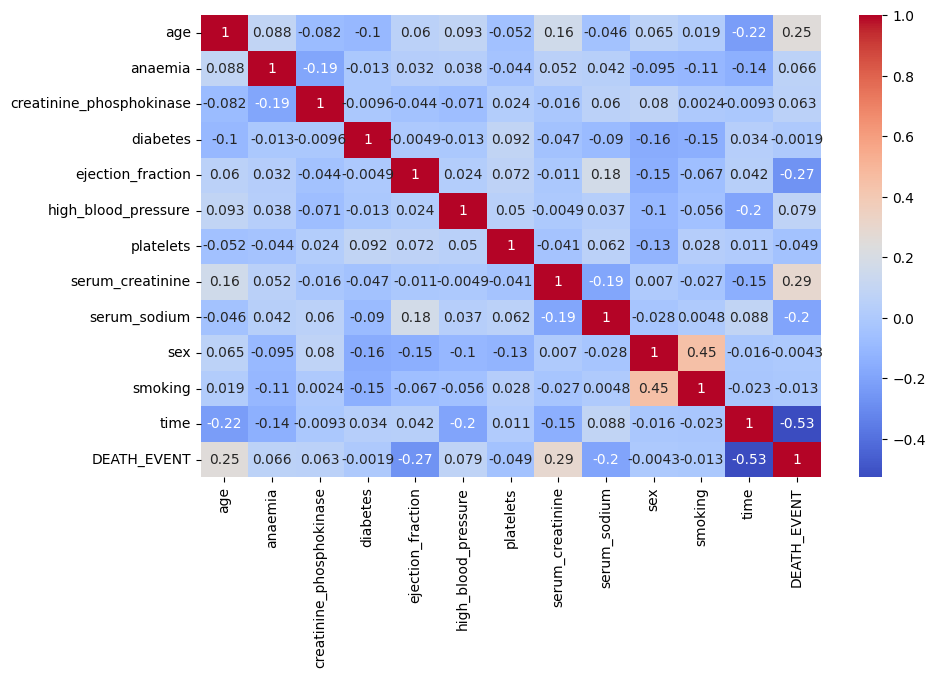

In [ ]:
plt.figure(figsize=(10,6))
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.show()

age                         0.253729
anaemia                     0.066270
creatinine_phosphokinase    0.062728
diabetes                   -0.001943
ejection_fraction          -0.268603
high_blood_pressure         0.079351
platelets                  -0.049139
serum_creatinine            0.294278
serum_sodium               -0.195204
sex                        -0.004316
smoking                    -0.012623
time                       -0.526964
DEATH_EVENT                 1.000000
Name: DEATH_EVENT, dtype: float64


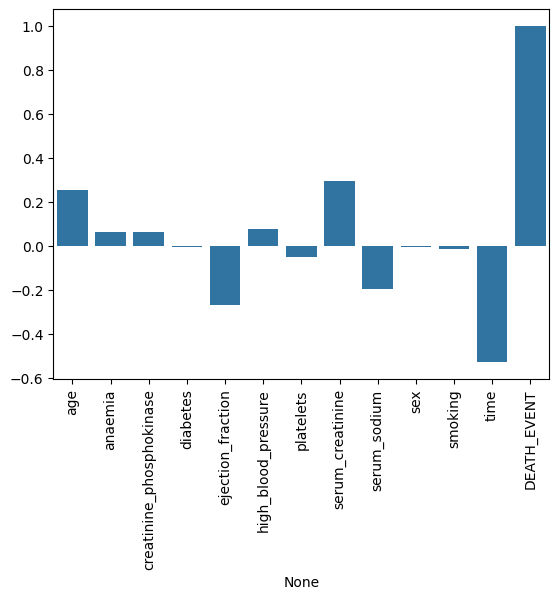

In [ ]:
df = pd.read_csv('/content/heart+failure+clinical+records.zip')
correlation = df.corr()
death_event_corr = correlation.iloc[:, df.columns.get_loc('DEATH_EVENT')]
print(death_event_corr)
sns.barplot(x=death_event_corr.index, y=death_event_corr.values)
plt.xticks(rotation=90)
plt.show()

In [ ]:
# serum creatinine vs creatinine phosphatase

creatinine = df.groupby('serum_creatinine')['creatinine_phosphokinase'].mean()
creatinine

,creatinine_phosphokinase
serum_creatinine,
0.50,2522.000000
0.60,493.500000
0.70,432.263158
0.75,96.000000
0.80,444.583333
0.90,666.250000
1.00,843.720000
1.10,776.718750
1.18,1000.727273


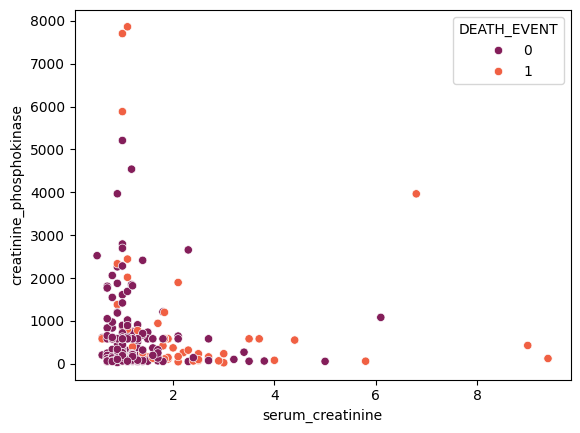

In [ ]:
sns.scatterplot(x='serum_creatinine', y='creatinine_phosphokinase', data=df, hue='DEATH_EVENT', palette='rocket')
plt.show()

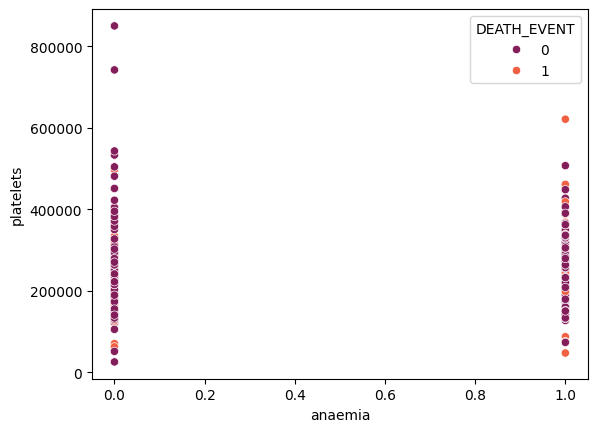

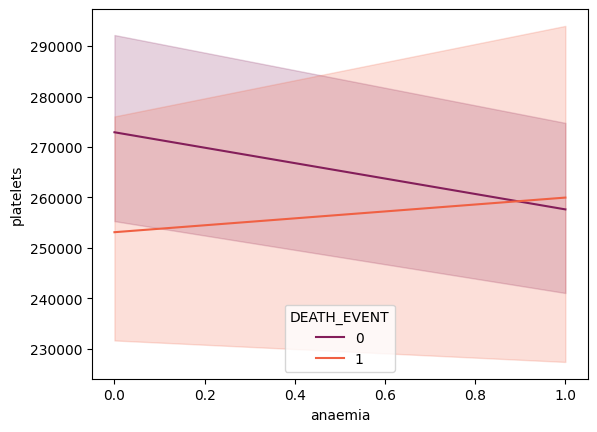

In [ ]:
# anaemia vs platelets

anaemia = df.groupby('anaemia')['platelets'].mean()
anaemia

sns.scatterplot(x='anaemia', y='platelets', data=df, hue='DEATH_EVENT', palette='rocket')
plt.show()

sns.lineplot(x='anaemia', y='platelets', data=df, hue='DEATH_EVENT', palette='rocket')
plt.show()

In [ ]:
df.columns

Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time',
       'DEATH_EVENT'],
      dtype='object')

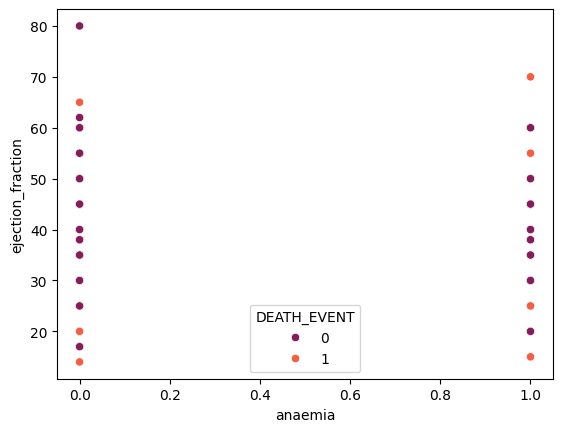

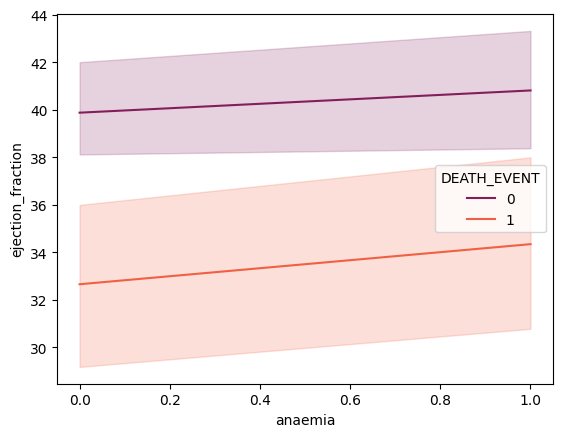

In [ ]:
# anaemia vs ejection_fraction

anaemia = df.groupby('anaemia')['ejection_fraction'].mean()
anaemia

sns.scatterplot(x='anaemia', y='ejection_fraction', data=df, hue='DEATH_EVENT', palette='rocket')
plt.show()

sns.lineplot(x='anaemia', y='ejection_fraction', data=df, hue='DEATH_EVENT', palette='rocket')
plt.show()

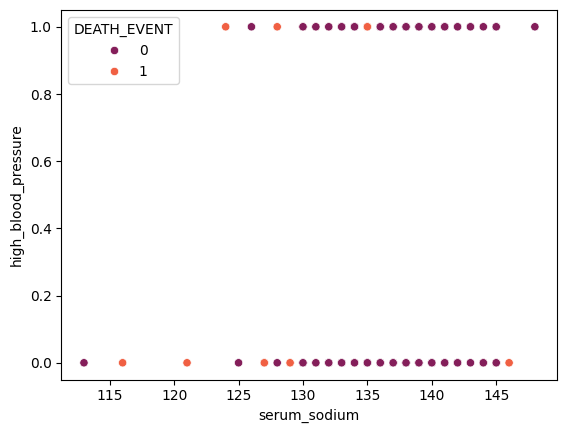

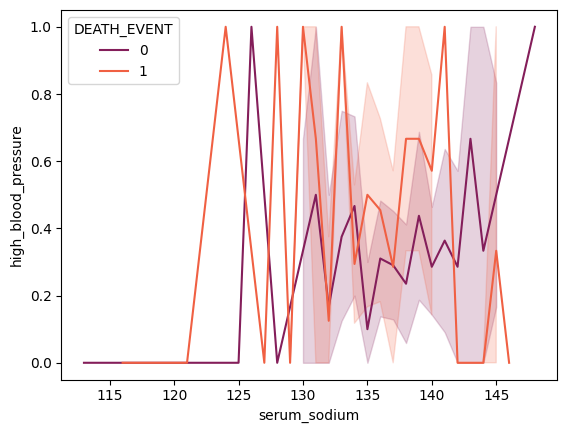

In [ ]:
#serum sodium vs high blood pressure

sodium = df.groupby('serum_sodium')['high_blood_pressure'].mean()
sodium

sns.scatterplot(x='serum_sodium', y='high_blood_pressure', data=df, hue='DEATH_EVENT', palette='rocket')
plt.show()

sns.lineplot(x='serum_sodium', y='high_blood_pressure', data=df, hue='DEATH_EVENT', palette='rocket')
plt.show()

In [ ]:
df2 = df[['anaemia', 'high_blood_pressure','DEATH_EVENT','platelets']]
df2.corr()

,anaemia,high_blood_pressure,DEATH_EVENT,platelets
anaemia,1.000000,0.038182,0.066270,-0.043786
high_blood_pressure,0.038182,1.000000,0.079351,0.049963
DEATH_EVENT,0.066270,0.079351,1.000000,-0.049139
platelets,-0.043786,0.049963,-0.049139,1.000000


In [ ]:
df2.corr()['DEATH_EVENT'].sort_values(ascending=False)

,DEATH_EVENT
DEATH_EVENT,1.000000
high_blood_pressure,0.079351
anaemia,0.066270
platelets,-0.049139


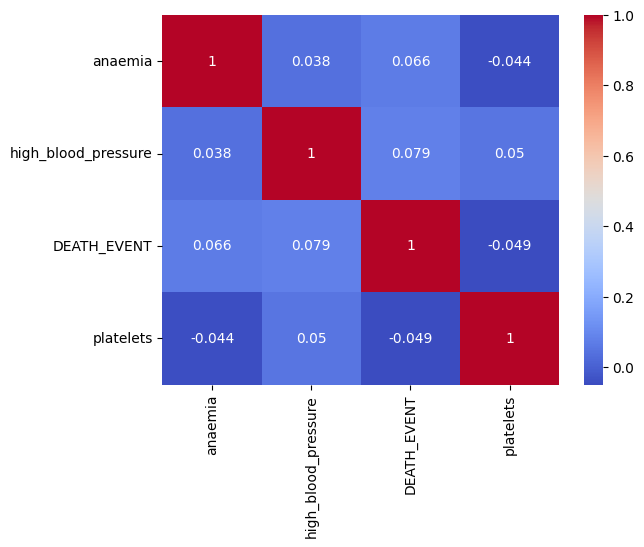

In [ ]:
sns.heatmap(df2.corr(), annot=True, cmap='coolwarm')
plt.show()

STATISTICAL ANALYSIS

In [ ]:
df.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


In [ ]:
print({'mean:', df.mean, 'median:', df.median, 'mode:', df.mode, 'standard deviation:', df.std})


{<bound method DataFrame.median of       age  anaemia  creatinine_phosphokinase  diabetes  ejection_fraction  \
0    75.0        0                       582         0                 20   
1    55.0        0                      7861         0                 38   
2    65.0        0                       146         0                 20   
3    50.0        1                       111         0                 20   
4    65.0        1                       160         1                 20   
..    ...      ...                       ...       ...                ...   
294  62.0        0                        61         1                 38   
295  55.0        0                      1820         0                 38   
296  45.0        0                      2060         1                 60   
297  45.0        0                      2413         0                 38   
298  50.0        0                       196         0                 45   

     high_blood_pressure  platelets  ser

In [ ]:
import scipy.stats as stats

death = df[df['DEATH_EVENT'] == 1][['high_blood_pressure', 'serum_creatinine']]
alive = df[df['DEATH_EVENT'] == 0][['high_blood_pressure', 'serum_creatinine']]

t_statistic, p_value = stats.ttest_ind(death['high_blood_pressure'], alive['high_blood_pressure'])
print("T-statistic:", t_statistic)
print("P-value:", p_value)

alpha = 0.05
if p_value < alpha:
  print("Reject the H0")
else:
  print("Fail to reject the H0")

T-statistic: 1.3718371343161466
P-value: 0.17114949852935332
Fail to reject the H0


Machine Learning Part

In [ ]:
x = df.drop('DEATH_EVENT', axis=1)
y = df['DEATH_EVENT']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

model = RandomForestClassifier(random_state=42)
model.fit(x_train, y_train)
predictions = model.predict(x_test)

model = DecisionTreeClassifier(random_state=42)
model.fit(x_train, y_train)
predictions = model.predict(x_test)

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train, y_train)
predictions = knn.predict(x_test)

svm = SVC(kernel='linear', random_state=42)
svm.fit(x_train, y_train)
predictions = svm.predict(x_test)

nb = GaussianNB()
nb.fit(x_train, y_train)
predictions = nb.predict(x_test)

print(classification_report(y_test, predictions))
print(confusion_matrix(y_test, predictions))


              precision    recall  f1-score   support

           0       0.69      0.97      0.81        35
           1       0.91      0.40      0.56        25

    accuracy                           0.73        60
   macro avg       0.80      0.69      0.68        60
weighted avg       0.78      0.73      0.70        60

[[34  1]
 [15 10]]
0.638813559322034


              precision    recall  f1-score   support

           0       0.58      1.00      0.74        35
           1       0.00      0.00      0.00        25

    accuracy                           0.58        60
   macro avg       0.29      0.50      0.37        60
weighted avg       0.34      0.58      0.43        60

[[35  0]
 [25  0]]


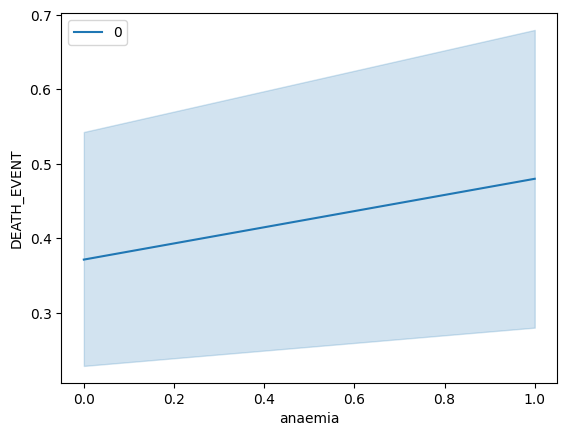

In [ ]:
# prediction of death from anemia

x = df['anaemia']
y = df['DEATH_EVENT']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
model = RandomForestClassifier(random_state=42)
model.fit(x_train.values.reshape(-1, 1), y_train)
predictions = model.predict(x_test.values.reshape(-1, 1))
print(classification_report(y_test, predictions))
print(confusion_matrix(y_test, predictions))

sns.lineplot(x=x_test, y=y_test, hue=predictions)
plt.show()

              precision    recall  f1-score   support

           0       0.62      0.89      0.73        35
           1       0.60      0.24      0.34        25

    accuracy                           0.62        60
   macro avg       0.61      0.56      0.54        60
weighted avg       0.61      0.62      0.57        60

[[31  4]
 [19  6]]


<Axes: xlabel='serum_creatinine', ylabel='DEATH_EVENT'>

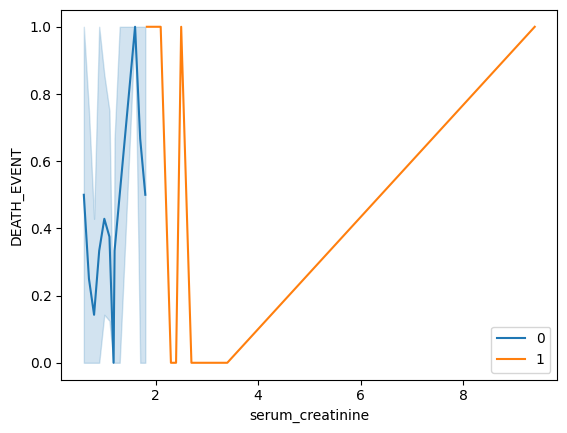

In [ ]:
# prediction of death from serum_creatinine

x = df['serum_creatinine']
y = df['DEATH_EVENT']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
model = RandomForestClassifier(random_state=42)
model.fit(x_train.values.reshape(-1, 1), y_train)
predictions = model.predict(x_test.values.reshape(-1, 1))
print(classification_report(y_test, predictions))
print(confusion_matrix(y_test, predictions))

sns.lineplot(x=x_test, y=y_test, hue=predictions)

<Axes: xlabel='serum_creatinine', ylabel='high_blood_pressure'>

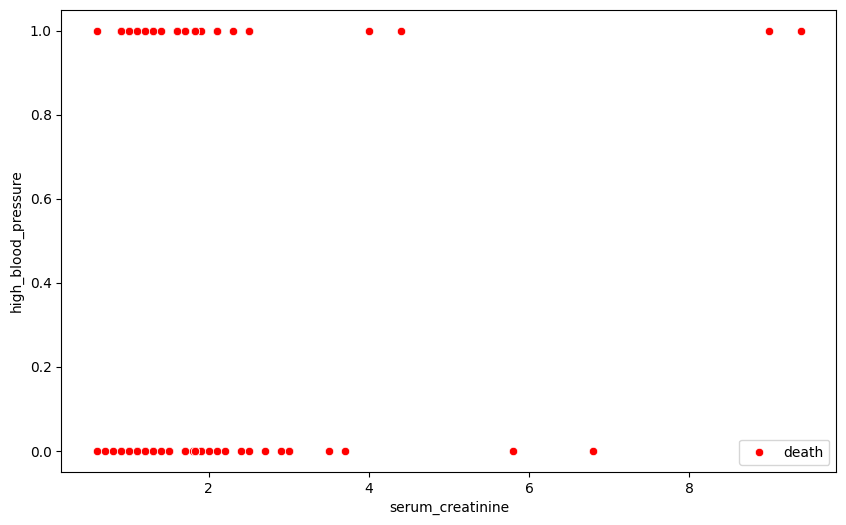

In [ ]:
# group by death

death = df[df['DEATH_EVENT'] == 1][['high_blood_pressure', 'serum_creatinine']]
alive = df[df['DEATH_EVENT'] == 0][['high_blood_pressure', 'serum_creatinine']]

plt.figure(figsize=(10,6))
sns.scatterplot(x='serum_creatinine', y='high_blood_pressure', data=death, color='red', label='death')